In [1]:
import pandas as pd

In [2]:
df_customer=pd.read_csv("customers.csv")

In [3]:
df_customer.head()

,customer_id,name,age,gender,city,join_date,recency,frequency,monetary,segment
0,570586,Falak Kanda,37,M,Guwahati,2023-04-13,1.0,9.0,2777.92,At-Risk Customers
1,294484,Meera Parekh,36,M,Kolkata,2023-06-25,7.0,10.0,9333.17,Hibernating Customers
2,669686,Manya Chad,44,M,Kolkata,2022-05-09,37.0,6.0,3243.52,At-Risk Customers
3,607103,Fitan Desai,18,F,Ahmedabad,2024-12-01,8.0,12.0,10222.43,Regular Shoppers
4,633928,Hemal Pandey,37,M,Ahmedabad,2023-03-26,8.0,6.0,4519.36,At-Risk Customers


In [4]:
df_customer=df_customer.drop(columns='segment')

In [5]:
df_customer.head()

,customer_id,name,age,gender,city,join_date,recency,frequency,monetary
0,570586,Falak Kanda,37,M,Guwahati,2023-04-13,1.0,9.0,2777.92
1,294484,Meera Parekh,36,M,Kolkata,2023-06-25,7.0,10.0,9333.17
2,669686,Manya Chad,44,M,Kolkata,2022-05-09,37.0,6.0,3243.52
3,607103,Fitan Desai,18,F,Ahmedabad,2024-12-01,8.0,12.0,10222.43
4,633928,Hemal Pandey,37,M,Ahmedabad,2023-03-26,8.0,6.0,4519.36


In [6]:
df_customer.isna().sum()

customer_id    0
name           0
age            0
gender         0
city           0
join_date      0
recency        0
frequency      0
monetary       0
dtype: int64

In [7]:
df_customer['gender'].value_counts()

F    2728
M    2272
Name: gender, dtype: int64

In [8]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  5000 non-null   int64  
 1   name         5000 non-null   object 
 2   age          5000 non-null   int64  
 3   gender       5000 non-null   object 
 4   city         5000 non-null   object 
 5   join_date    5000 non-null   object 
 6   recency      5000 non-null   float64
 7   frequency    5000 non-null   float64
 8   monetary     5000 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 351.7+ KB


In [9]:
df_customer.describe()

,customer_id,age,recency,frequency,monetary
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,500658.747400,34.815600,35.891600,10.000000,6087.317836
std,290139.584871,10.993642,38.580974,3.161645,2487.262165
min,539.000000,18.000000,0.000000,0.000000,0.000000
25%,245925.750000,26.000000,10.000000,8.000000,4256.645000
50%,511824.500000,34.000000,24.000000,10.000000,5902.380000
75%,756810.500000,42.000000,49.000000,12.000000,7605.112500
max,999765.000000,75.000000,365.000000,23.000000,20866.040000


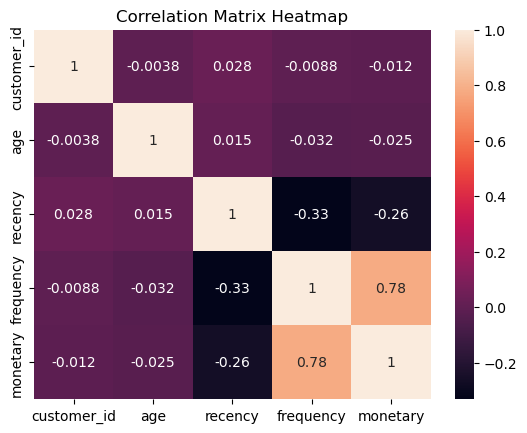

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix=df_customer.corr()
# Create a heatmap
sns.heatmap(correlation_matrix, annot=True)
# Set title
plt.title('Correlation Matrix Heatmap')
# Show the plot
plt.show()

In [11]:
df_customer = df_customer.drop(columns=['name', 'join_date'])
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  5000 non-null   int64  
 1   age          5000 non-null   int64  
 2   gender       5000 non-null   object 
 3   city         5000 non-null   object 
 4   recency      5000 non-null   float64
 5   frequency    5000 non-null   float64
 6   monetary     5000 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 273.6+ KB


In [12]:
df_customer['city'].value_counts()

Chennai        542
Bangalore      524
Guwahati       501
Imphal         501
Bhubaneswar    500
Chandigarh     498
Ahmedabad      488
Mumbai         486
Delhi          481
Kolkata        479
Name: city, dtype: int64

In [13]:
df_customer['age'].value_counts()

18    455
34    201
33    179
39    172
35    172
28    161
36    160
37    160
32    160
38    159
41    151
26    148
44    145
30    145
27    142
31    140
40    138
42    137
29    137
24    125
23    117
25    117
45    115
46    112
43    112
21     89
47     84
20     84
22     75
48     72
50     68
49     65
19     61
52     61
51     59
53     52
54     47
58     34
55     29
57     24
59     24
56     24
61     16
60     15
64     12
63     12
62      7
65      7
66      4
67      3
68      3
69      3
73      2
74      1
71      1
75      1
72      1
Name: age, dtype: int64

In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [15]:
df_customer.head()

,customer_id,age,gender,city,recency,frequency,monetary
0,570586,37,M,Guwahati,1.0,9.0,2777.92
1,294484,36,M,Kolkata,7.0,10.0,9333.17
2,669686,44,M,Kolkata,37.0,6.0,3243.52
3,607103,18,F,Ahmedabad,8.0,12.0,10222.43
4,633928,37,M,Ahmedabad,8.0,6.0,4519.36


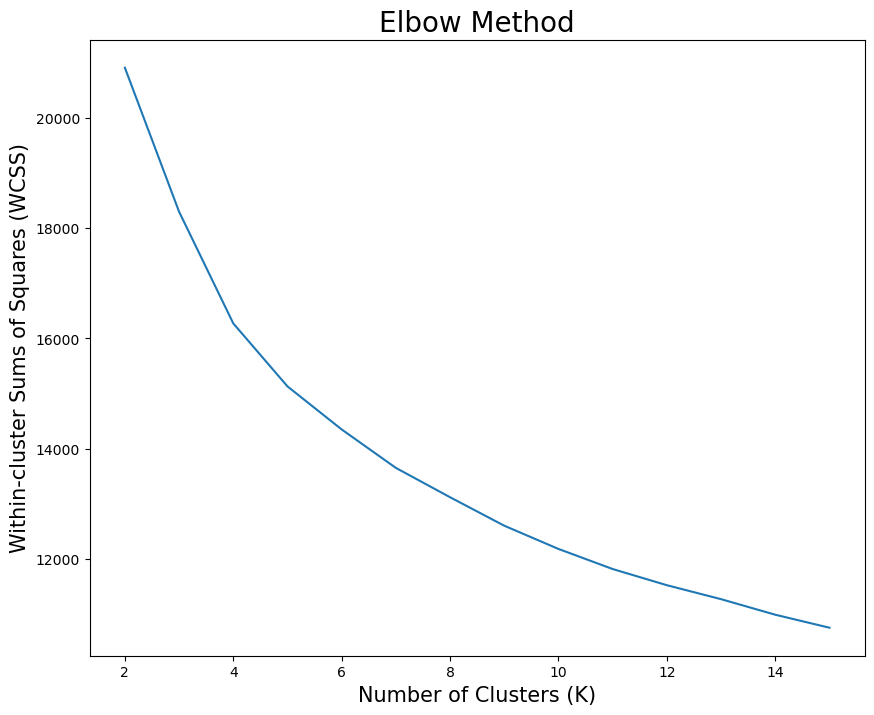

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Preprocess the data: Standardize numerical columns and encode categorical ones
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Create a ColumnTransformer to apply transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'recency', 'frequency', 'monetary']),  # Scale numerical features
        ('cat', OneHotEncoder(dtype=int), ['gender', 'city'])  # One-hot encode categorical features
    ])

# Apply the transformations to the data
processed_data = preprocessor.fit_transform(df_customer)

# Initialize the WCSS list
wcss = []

# Loop through different values of K (from 2 to 15 clusters)
for i in range(2, 16):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=500, n_init=10, random_state=1)
    km.fit(processed_data)  # Fit K-means on the processed data
    wcss.append(km.inertia_)  # Append the WCSS value

# Plot the Elbow Method
plt.figure(figsize=(10, 8))
sns.lineplot(x=range(2, 16), y=wcss)
plt.title('Elbow Method', fontsize=20)
plt.xlabel('Number of Clusters (K)', fontsize=15)
plt.ylabel('Within-cluster Sums of Squares (WCSS)', fontsize=15)
plt.show()


In [18]:
processed_data

array([[ 0.19871653, -0.90446368, -0.31632268, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.10774577, -0.74893106,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.83551187,  0.02873206, -1.26529071, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.65357035,  0.08057627, -0.94896803, ...,  0.        ,
         0.        ,  0.        ],
       [-0.4380788 , -0.61932054,  0.94896803, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.7452195 , -0.87854158,  1.89793606, ...,  0.        ,
         0.        ,  0.        ]])

   customer_id  cluster
0       570586        1
1       294484        0
2       669686        1
3       607103        0
4       633928        1


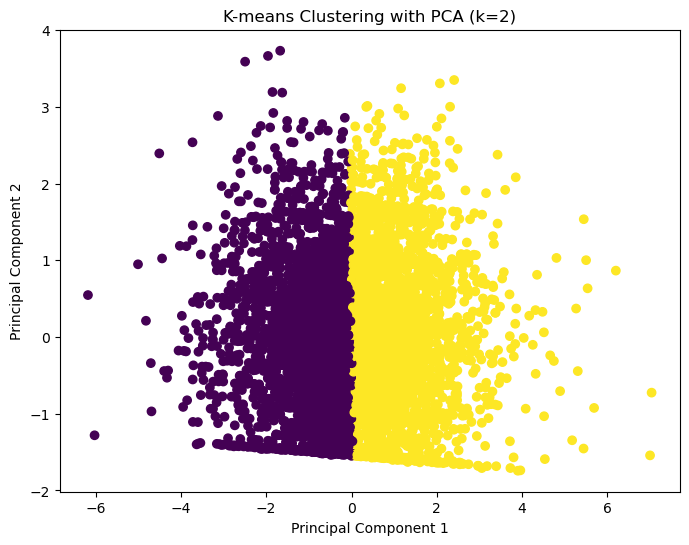

In [31]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

cols = ['age', 'recency', 'frequency', 'monetary']

# Step 1: Preprocess the data (e.g., scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_customer[cols])

# Step 2: Apply PCA for dimensionality reduction (e.g., reduce to 2 components for visualization)
pca = PCA(n_components=2)  # Reduce to 2 components for easy visualization
pca_data = pca.fit_transform(scaled_data)

# Step 3: Apply K-means with k=2
kmeans = KMeans(n_clusters=2, random_state=1)
cluster_labels = kmeans.fit_predict(pca_data)

# Step 4: Add the cluster labels to your original data
df_customer['cluster'] = cluster_labels

# Step 5: Display the results (e.g., show first few rows of data with cluster labels)
print(df_customer[['customer_id', 'cluster']].head())

# Step 6: Visualize the results (scatter plot of the first two PCA components)
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-means Clustering with PCA (k=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


K=2, Silhouette Score=0.35459735919749236
K=3, Silhouette Score=0.33210520771223556
K=4, Silhouette Score=0.32967583489355773
K=5, Silhouette Score=0.32712786260555815
K=6, Silhouette Score=0.3214340685645333
K=7, Silhouette Score=0.324759648437556
K=8, Silhouette Score=0.32898582115949077
K=9, Silhouette Score=0.32533211049882066
K=10, Silhouette Score=0.3315959745386674


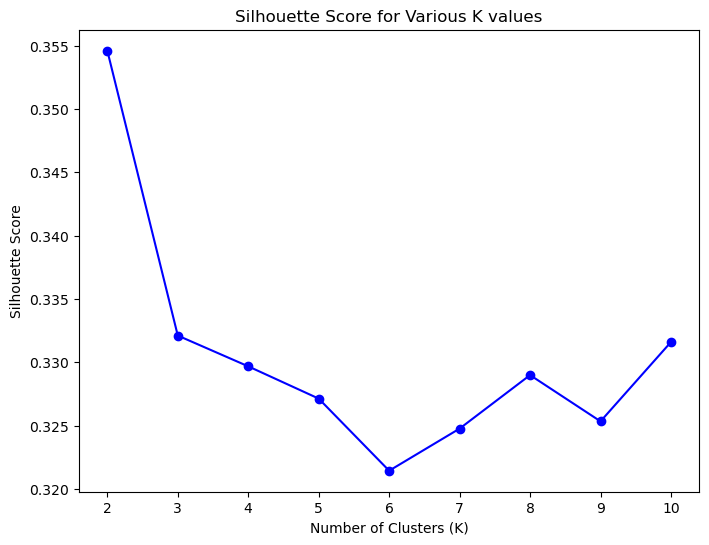

Best K value based on Silhouette Score: 2


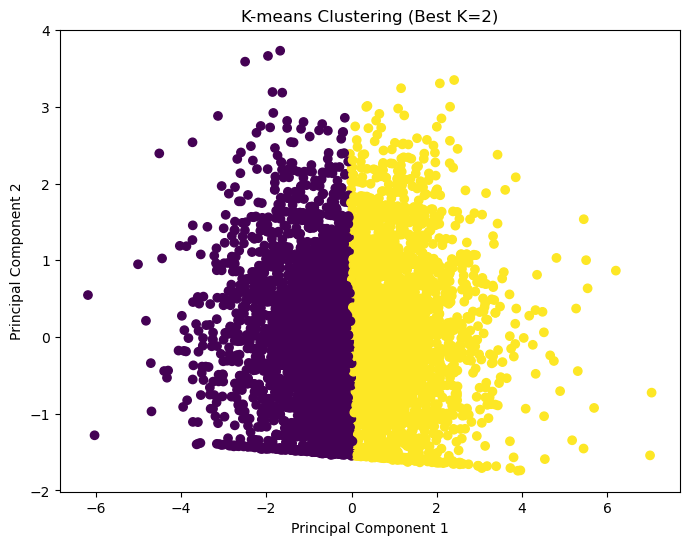

In [46]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd

cols = ['age', 'recency', 'frequency', 'monetary']

# Step 1: Preprocess the data (e.g., scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_customer[cols])

# Step 2: Apply PCA for dimensionality reduction (e.g., reduce to 2 components for easy visualization)
pca = PCA(n_components=2)  # Reduce to 2 components for easy visualization
pca_data = pca.fit_transform(scaled_data)

# Step 3: Apply K-means for various values of k and compute Silhouette Score
silhouette_scores = []
k_range = range(2, 11)  # Try k from 2 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1)
    cluster_labels = kmeans.fit_predict(pca_data)
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"K={k}, Silhouette Score={silhouette_avg}")

# Step 4: Plot Silhouette Scores for each K
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Score for Various K values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Step 5: Apply K-means with the best K based on silhouette score
best_k = k_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Best K value based on Silhouette Score: {best_k}")

# Step 6: Re-run K-means with the best K and visualize the clusters
best_kmeans = KMeans(n_clusters=best_k, random_state=1)
best_cluster_labels = best_kmeans.fit_predict(pca_data)

# Step 4: Add the cluster labels to your original data
df_customer['cluster'] = best_cluster_labels

# Visualize the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=best_cluster_labels, cmap='viridis')
plt.title(f'K-means Clustering (Best K={best_k})')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


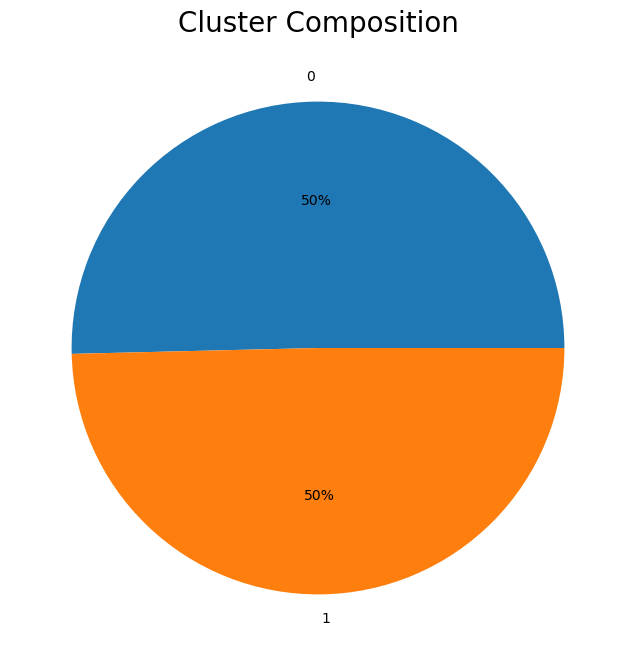

In [47]:
fig, axs = plt.subplots(figsize=(12,8))
ax = df_customer['cluster'].value_counts().plot.pie(autopct='%1.0f%%')
ax.set_ylabel('')
ax.set_title('Cluster Composition')
ax.title.set_size(20)
plt.show()

In [48]:
# Get summary statistics for each cluster
cluster_summary = df_customer.groupby('cluster').describe()
cluster_summary.T

cluster                        0              1
customer_id count    2519.000000    2481.000000
            mean   497626.354506  503737.585651
            std    292877.848812  287358.977826
            min       539.000000     765.000000
            25%    235480.500000  253855.000000
            50%    505199.000000  514589.000000
            75%    763231.000000  753545.000000
            max    999702.000000  999765.000000
age         count    2519.000000    2481.000000
            mean       33.875744      35.769851
            std        10.848991      11.059327
            min        18.000000      18.000000
            25%        26.000000      27.000000
            50%        33.000000      35.000000
            75%        41.000000      43.000000
            max        75.000000      73.000000
recency     count    2519.000000    2481.000000
            mean       21.994442      50.001612
            std        20.926551      46.480311
            min         0.000000       0.000000
            25%         6.000000      16.000000
            50%        16.000000      37.000000
            75%        32.000000      71.000000
            max       148.000000     365.000000
frequency   count    2519.000000    2481.000000
            mean       12.323144       7.641274
            std         2.320691       1.906138
            min         7.000000       0.000000
            25%        11.000000       6.000000
            50%        12.000000       8.000000
            75%        14.000000       9.000000
            max        23.000000      13.000000
monetary    count    2519.000000    2481.000000
            mean     7870.590020    4276.732334
            std      1988.072580    1395.574783
            min      3056.290000       0.000000
            25%      6517.610000    3323.500000
            50%      7552.430000    4274.060000
            75%      8932.925000    5233.770000
            max     20866.040000    9760.340000

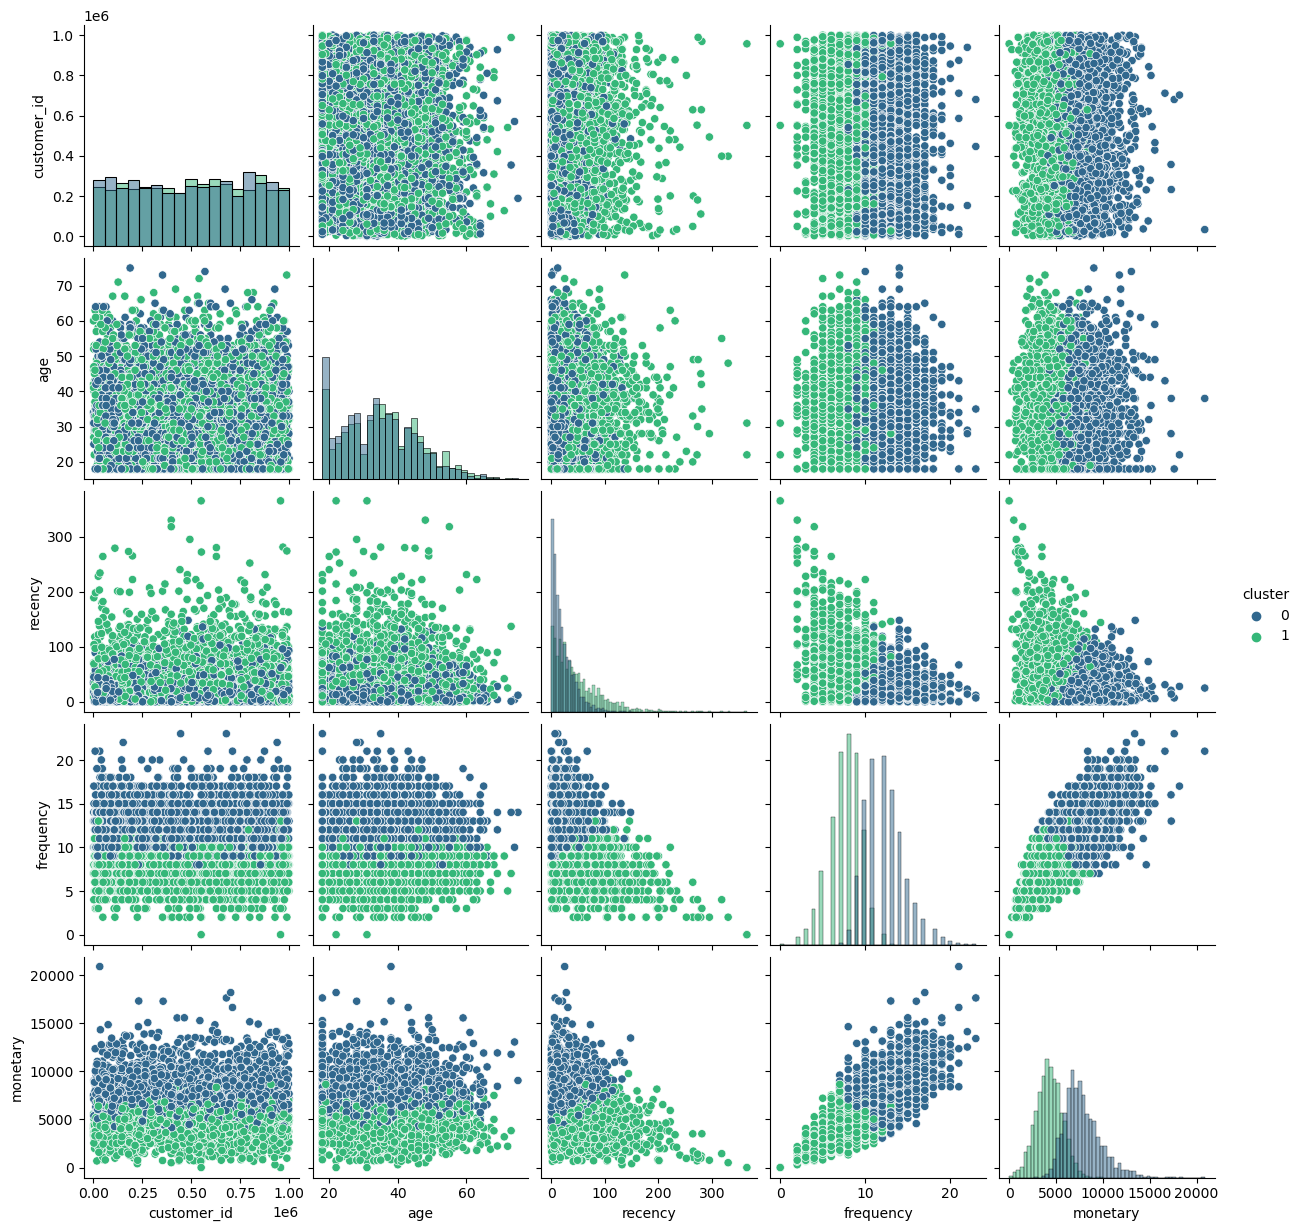

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_customer, hue='cluster', diag_kind='hist', palette='viridis')
plt.show()


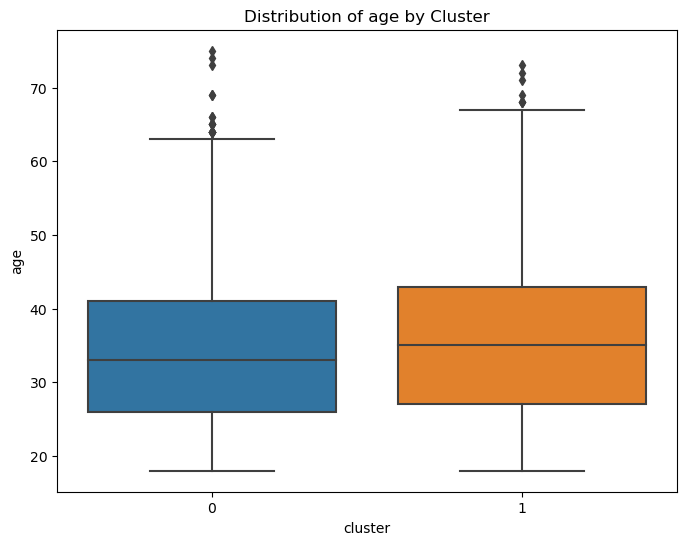

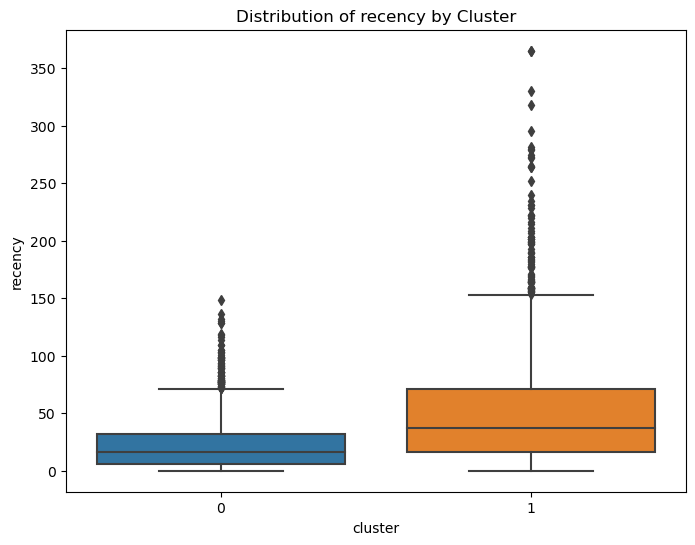

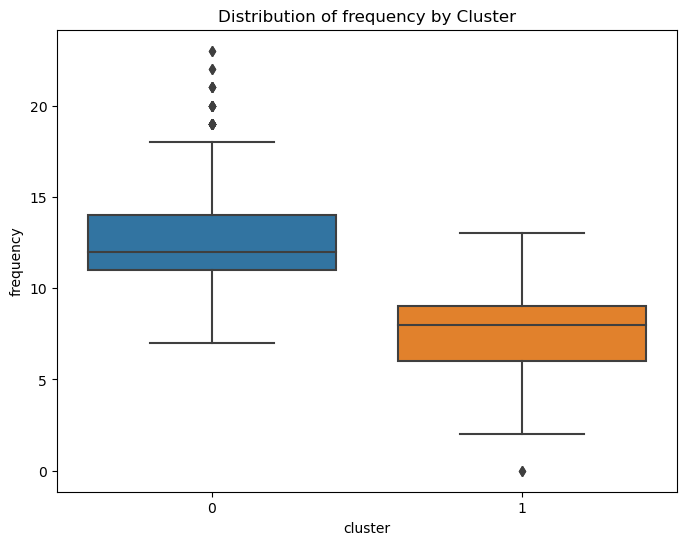

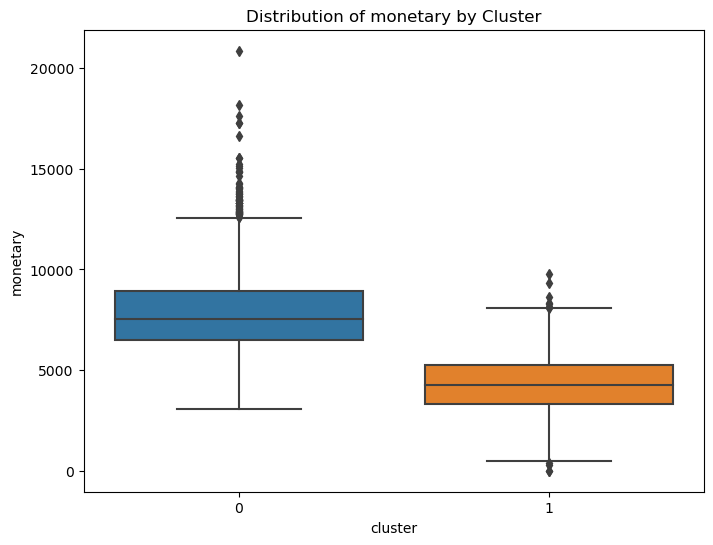

In [51]:
for col in cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='cluster', y=col, data=df_customer)
    plt.title(f'Distribution of {col} by Cluster')
    plt.show()


Based on the provided EDA summary of the two clusters, we can draw several insights about the characteristics and behavior of customers in each cluster:

# Cluster 0 (2519 customers)
## # Age: 
Average age is around 34 years, indicating a relatively younger customer base compared to Cluster 1.
### Recency: 
The average recency is 22 days, meaning these customers have purchased more recently, indicating higher engagement.
### Frequency: 
An average of 12.3 purchases, showing frequent buying behavior.
### Monetary: 
Average spending is around $7,870, suggesting they are high spenders.
### Summary:
Engaged, loyal, and high-value customers.
Likely to respond well to loyalty programs or exclusive offers.
Younger demographic, possibly more open to digital marketing.

# Cluster 1 (2481 customers)
### Age: 
Average age is around 36 years, slightly older demographic than Cluster 0.
### Recency: 
Average recency is 50 days, meaning they have not purchased recently, indicating lower engagement.
### Frequency: 
An average of 7.6 purchases, showing less frequent buying.
### Monetary: 
Average spending is around $4,277, indicating they are moderate to low spenders.
### Summary:
Less engaged, lower spending customers.
Might benefit from reactivation campaigns, such as discounts or reminders.
Older demographic may respond better to personalized offers or traditional marketing channels.

# Key Takeaways:
Cluster 0 represents the core loyal customers with high frequency and spending, and recent activity.
Cluster 1 includes less active customers who could be targeted with re-engagement strategies.
The age gap between clusters suggests the need for tailored marketing strategies based on customer demographics.

In [3]:
import pandas as pd
transaction_df=pd.read_csv("transactions2.csv")
transaction_df.head()

,transac_id,customer_id,basket,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,store_id,timestamp,quantity,price,city,total_spent
0,12673944.0,222087.0,"27,26",NaN,NaN,NaN,NaN,Store_31,2/27/2024,1.0,176.53,Chennai,176.53
1,44765016.0,1343649.0,"6,47,17",NaN,NaN,NaN,NaN,Store_40,1/7/2025,2.0,303.61,Imphal,607.22
2,12708392.0,404134.0,"18,12,23,22,27,43,38,20,35,1",NaN,NaN,NaN,NaN,Store_17,4/15/2024,3.0,435.98,Bhubaneswar,1307.94
3,77982381.0,1110200.0,"9,23,2,20,26,47,37",NaN,NaN,NaN,NaN,Store_16,10/14/2024,2.0,97.68,Kolkata,195.36
4,25623482.0,224107.0,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4...",NaN,NaN,NaN,NaN,Store_19,10/8/2024,3.0,239.04,Kolkata,717.12


In [4]:
transaction_df=transaction_df.drop(columns=["Unnamed: 3","Unnamed: 4","Unnamed: 5","Unnamed: 6"])
transaction_df.head()

,transac_id,customer_id,basket,store_id,timestamp,quantity,price,city,total_spent
0,12673944.0,222087.0,"27,26",Store_31,2/27/2024,1.0,176.53,Chennai,176.53
1,44765016.0,1343649.0,"6,47,17",Store_40,1/7/2025,2.0,303.61,Imphal,607.22
2,12708392.0,404134.0,"18,12,23,22,27,43,38,20,35,1",Store_17,4/15/2024,3.0,435.98,Bhubaneswar,1307.94
3,77982381.0,1110200.0,"9,23,2,20,26,47,37",Store_16,10/14/2024,2.0,97.68,Kolkata,195.36
4,25623482.0,224107.0,"31,18,5,13,1,21,48,16,26,2,44,32,20,37,42,35,4...",Store_19,10/8/2024,3.0,239.04,Kolkata,717.12


In [7]:
transaction_df["timestamp"].value_counts().head(50)

5/22/2024     142
2/15/2024     131
1/26/2025     131
10/19/2024    130
12/20/2024    130
12/27/2024    128
8/12/2024     128
12/15/2024    128
11/11/2024    127
12/14/2024    127
1/21/2025     127
1/2/2025      127
2/21/2024     127
5/8/2024      126
10/11/2024    126
7/16/2024     126
9/22/2024     126
8/16/2024     126
6/4/2024      126
10/12/2024    125
7/9/2024      125
9/7/2024      125
7/27/2024     124
12/10/2024    124
3/4/2024      124
11/3/2024     124
10/4/2024     124
2/12/2024     123
12/13/2024    123
4/6/2024      123
10/13/2024    123
11/13/2024    123
1/9/2025      123
7/31/2024     122
6/11/2024     122
10/22/2024    122
9/20/2024     122
6/5/2024      122
5/2/2024      122
7/1/2024      121
4/1/2024      121
6/24/2024     121
12/19/2024    121
8/13/2024     121
4/11/2024     121
3/29/2024     121
2/1/2024      121
8/9/2024      121
6/28/2024     120
5/7/2024      120
Name: timestamp, dtype: int64

10526 timestamps could not be converted.


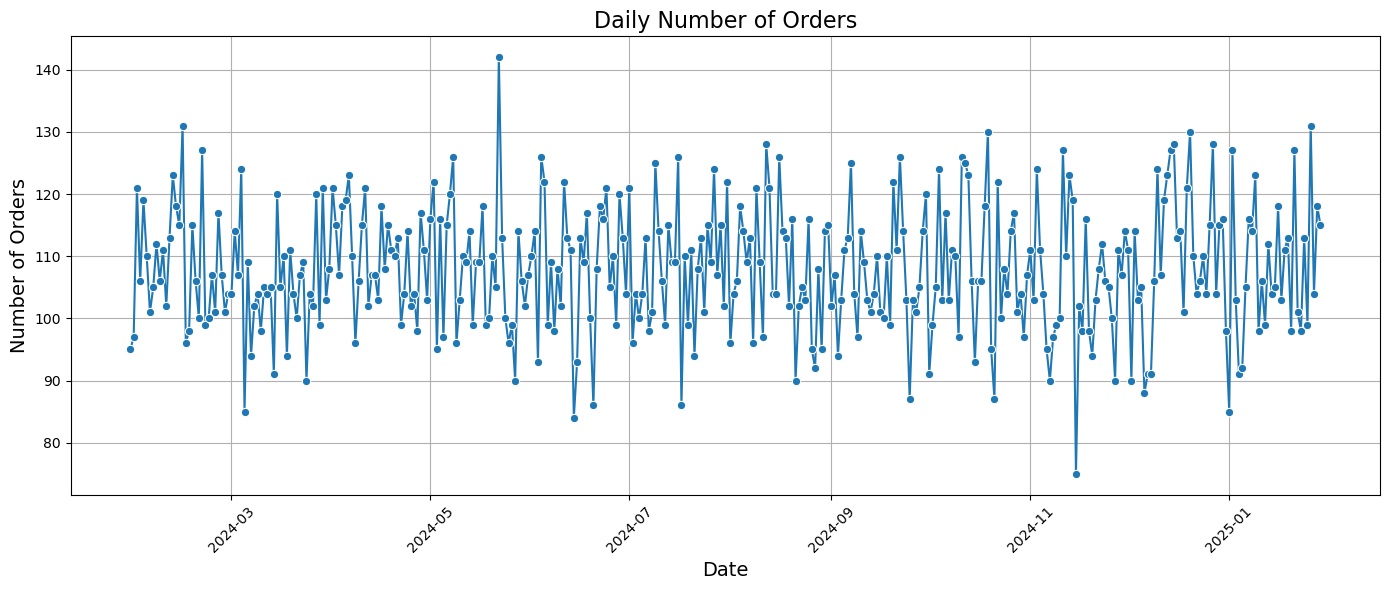

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("transactions2.csv")

# Convert 'timestamp' to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

# Check for any conversion issues (optional)
print(df['timestamp'].isnull().sum(), "timestamps could not be converted.")

# Extract the date from the timestamp
df['date'] = df['timestamp'].dt.date

# Group by date to count the number of orders per day
daily_orders = df.groupby('date').size().reset_index(name='order_count')

# Sort by date
daily_orders = daily_orders.sort_values(by='date')

# Plotting
plt.figure(figsize=(14, 6))
sns.lineplot(x='date', y='order_count', data=daily_orders, marker='o')

# Formatting the plot
plt.title('Daily Number of Orders', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Orders', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

